__2a)__

Sum of i.i.d. Bernoulli random variables is a Binomial random variable. Let us generate the Binomial random variable H 1000 times with the given parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
p = 1/3
n = pow(10,3) # number of trials
r = pow(10,3) # number of H variables generated

In [3]:
H_list = np.random.binomial(n, p, r)

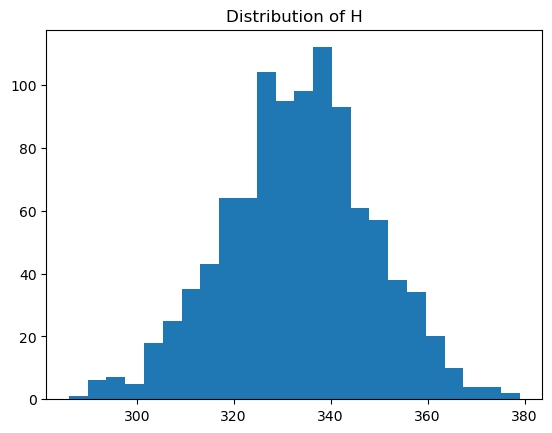

In [4]:
plt.hist(H_list, bins='auto')
plt.title("Distribution of H")
plt.show()

__2b)__

First, let us normalize H. The mean of a binomial variable is np, whereas the variance is np(1-p).

In [5]:
H_normal = [(x - n*p)/math.sqrt(n*p*(1-p)) for x in H_list]

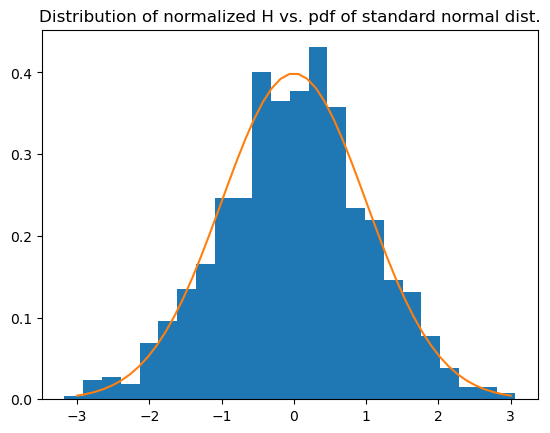

In [6]:
plt.hist(H_normal, bins='auto', density = True)
plt.title("Distribution of normalized H vs. pdf of standard normal dist.")
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Increasing number of H variables generated should improve this approximation. 

__2c)__

Since we would like to get a two-tailed confidence interval, we will put 0.975 in the inverse cdf function. We expect the result to be 1.96 from experience. Then, it is a matter of recalculating the interval limits: ±1.96 * sqrt(n * p * (1-p)) + (n * p).

In [7]:
from statistics import NormalDist

ci = NormalDist().inv_cdf(0.975)

In [8]:
upper_limit = ci * math.sqrt(n * p * (1-p)) + (n * p)
lower_limit = -ci * math.sqrt(n * p * (1-p)) + (n * p)
print(lower_limit, upper_limit)

304.1159153141139 362.5507513525527


95% of values fall between approximately 304.11 and 362.55.